## Installations

In [1]:
!pip install ripser persim PersistenceImages
!pip install git+https://github.com/shizuo-kaji/CubicalRipser_3dim
!pip install tomaster Boruta
!pip install POT

  Cloning https://github.com/shizuo-kaji/CubicalRipser_3dim to /tmp/pip-req-build-sht9j7uv
  Running command git clone --filter=blob:none --quiet https://github.com/shizuo-kaji/CubicalRipser_3dim /tmp/pip-req-build-sht9j7uv
  Resolved https://github.com/shizuo-kaji/CubicalRipser_3dim to commit b31b9f38a73f7e5348b19297aa8ab8a1cde3afc9
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Application

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import resnetNN as res

In [3]:
#Getting the dataset and model
X = res.models.set_up()
X.get_dataset("stl10",resize_=200)
X.get_model("resnet18")

3-D
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
# X=res.models.set_up()
# X.get_dataset("aircraft")
# X.get_model("resnet50")

In [5]:
colur=["navy","darkblue","indigo","purple","darkviolet","violet",
       'hotpink',"orchid",'pink']

In [6]:
indices = torch.randperm(len(X.dataset))[:10];
layer_val=list(range(1,12))
# Data_loader
data_loader= torch.utils.data.DataLoader(X.dataset, batch_size=1,
            shuffle=False,sampler=indices,num_workers=2, pin_memory=True)
#Different threshold values
thresk = np.arange(0,2,0.25)

#Getting Betti numbers upto dimension 2 for each image at different threshold values
mat_bet=list(map(lambda x:res.matrix_betti(X.model,x[0],thres=thresk),data_loader))
mat_bet=np.asarray(mat_bet)

100%|██████████| 8/8 [00:00<00:00, 171.42it/s]


11
11
15500
15500


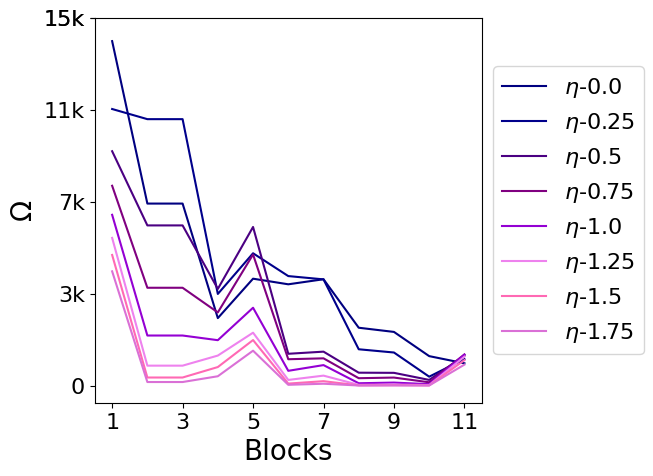

In [7]:
#For plotting
plt.figure(figsize=(5, 5))
a=0;
for k in tqdm(range(len(thresk))):
  thresh_set=mat_bet[:,k,:,:]
  # Sum the betti numbers
  thresh_set = thresh_set.sum(axis = 2)
  #print(thresh_set.shape)
  # Mean of betti numbers
  mean_betti = np.mean(thresh_set,axis=0)
  #print(mean_betti.shape)
  layer_val = list(range(1,len(mean_betti)+1))
  plt.plot(layer_val[:11],mean_betti.reshape(len(layer_val),)[:11],"-",
           label="$\eta$-"+str(thresk[k]),color=colur[k])

  a=max(a,np.amax(mean_betti.reshape(len(layer_val),)[:11]))

  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16)

plt.xticks(res.models.xticks_(layer_val[:11],4),res.models.xticks_(layer_val[:11],4),fontsize=16)
a=int(a+1000)
y_ax=list(range(0,a,100))
plt.yticks(res.models.xticks_(y_ax,4),res.models.yticks_(y_ax,4),fontsize=16)
plt.xlabel("Blocks",fontsize=20)
plt.ylabel("$\Omega$",fontsize=20)
plt.savefig("Diff_threshold_res18.eps", format='eps', bbox_inches='tight')
plt.show()